# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "C:\\Users\\Violet.Huang\\Documents\\14_Berkerly bootscamp\\Module 5\\Resources folder\\city_data.csv"
ride_data_to_load = "C:\\Users\\Violet.Huang\\Documents\\14_Berkerly bootscamp\\Module 5\\Resources folder\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# 1.1_define city type: Urban, Suburban, Rural
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# 1.2_count for each city
urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]
# 1.3_print summary
print(rural_ride_count, suburban_ride_count, urban_ride_count)

type
Rural    125
Name: ride_id, dtype: int64 type
Suburban    625
Name: ride_id, dtype: int64 type
Urban    1625
Name: ride_id, dtype: int64


In [4]:
###### 2. Get the total drivers for each city type
urban_driver_sum = city_data_df[city_data_df["type"] == "Urban"].sum()["driver_count"]
suburban_driver_sum = city_data_df[city_data_df["type"] == "Suburban"].sum()["driver_count"]
rural_driver_sum = city_data_df[city_data_df["type"] == "Rural"].sum()["driver_count"]

# 2.2_print summary 
print(rural_driver_sum, suburban_driver_sum, urban_driver_sum)
 

78 490 2405


In [5]:
#  3. Get the total amount of fares for each city type
urban_fare_sum = urban_cities_df.groupby(["type"]).sum()["fare"]
suburban_fare_sum = suburban_cities_df.groupby(["type"]).sum()["fare"]
rural_fare_sum = rural_cities_df.groupby(["type"]).sum()["fare"]
#3.2_print summary
print(rural_fare_sum,suburban_fare_sum,urban_fare_sum)

type
Rural    4327.93
Name: fare, dtype: float64 type
Suburban    19356.33
Name: fare, dtype: float64 type
Urban    39854.38
Name: fare, dtype: float64


In [6]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.groupby(["type"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["type"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["type"]).mean()["fare"]
#3.3_print summary
print(rural_avg_fare,suburban_avg_fare,urban_avg_fare)

type
Rural    34.62344
Name: fare, dtype: float64 type
Suburban    30.970128
Name: fare, dtype: float64 type
Urban    24.525772
Name: fare, dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 
urban_driver_avg_fare = urban_fare_sum /urban_driver_sum
suburban_driver_avg_fare = suburban_fare_sum /suburban_driver_sum
rural_driver_avg_fare = rural_fare_sum /rural_driver_sum
#3.3_print summary

print(rural_driver_avg_fare,suburban_driver_avg_fare,urban_driver_avg_fare)

type
Rural    55.486282
Name: fare, dtype: float64 type
Suburban    39.502714
Name: fare, dtype: float64 type
Urban    16.571468
Name: fare, dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"type": ["Rural", "Suburban", "Urban"],
                               "Total Rides":[rural_ride_count[0],suburban_ride_count[0],urban_ride_count[0]],
                               "Total Drivers": [rural_driver_sum,suburban_driver_sum,urban_driver_sum],
                               "Total Fares": [rural_fare_sum[0],suburban_fare_sum[0],urban_fare_sum[0]],
                               "Average Fare per Ride": [rural_avg_fare[0],suburban_avg_fare[0],urban_avg_fare[0]],
                               "Average Fare per Driver":[rural_driver_avg_fare[0],suburban_driver_avg_fare[0],urban_driver_avg_fare[0]]
                                })

pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({"type": ["Rural", "Suburban", "Urban"],
                               "Total Rides":[format(rural_ride_count[0], ',d'),format(suburban_ride_count[0], ',d'),format(urban_ride_count[0], ',d')],
                               "Total Drivers": [format(rural_driver_sum, ',d'),format(suburban_driver_sum, ',d'),format(urban_driver_sum,',d')],
                               "Total Fares": ["${:.2f}".format(rural_fare_sum[0]),"${:.2f}".format(suburban_fare_sum[0]),"${:.2f}".format(urban_fare_sum[0])],
                               "Average Fare per Ride": ["${:.2f}".format(rural_avg_fare[0]),"${:.2f}".format(suburban_avg_fare[0]),"${:.2f}".format(urban_avg_fare[0])],
                               "Average Fare per Driver":["${:.2f}".format(rural_driver_avg_fare[0]),"${:.2f}".format(suburban_driver_avg_fare[0]),"${:.2f}".format(urban_driver_avg_fare[0])]
                                })
new_pyber_summary_df =pyber_summary_df.set_index("type")
new_pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,"1,625","2,405",$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_the_fares = pyber_data_df.groupby(["date","type"]).sum()["fare"]
sum_of_the_fares.head(10)

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
1/1/2019 14:52  Suburban    31.15
1/1/2019 17:22  Urban       42.11
1/1/2019 21:04  Urban       11.71
1/1/2019 2:07   Suburban    24.07
1/1/2019 3:46   Urban        7.57
Name: fare, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
# print(new_sum_of_the_fares_df.columns)
sum_of_the_fares = sum_of_the_fares.reset_index()
sum_of_the_fares.head(10)


,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
5,1/1/2019 14:52,Suburban,31.15
6,1/1/2019 17:22,Urban,42.11
7,1/1/2019 21:04,Urban,11.71
8,1/1/2019 2:07,Suburban,24.07
9,1/1/2019 3:46,Urban,7.57


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 

# to get the total fares for each type of city by the date. 
pivot_table = sum_of_the_fares.pivot(index="date",columns="type", values="fare")
pivot_table.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#print(pivot_table.columns)
#pivot_table.head()
#pivot_table.shape
pivot_table.index = pd.to_datetime(pivot_table.index)
filtered_table = pivot_table.loc['2019-01-01':'2019-04-29']
#filtered_table = pivot_table.head(100)

#print(filtered_table)
filtered_table.shape
#filtered_table.head(10)
print(filtered_table)

type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN  37.91
2019-01-01 00:46:00    NaN     47.74    NaN
2019-01-01 12:32:00    NaN     25.56    NaN
2019-01-01 14:40:00    NaN       NaN   5.42
2019-01-01 14:42:00    NaN       NaN  12.31
...                    ...       ...    ...
2019-04-09 20:55:00    NaN       NaN  24.99
2019-04-09 21:41:00    NaN       NaN  15.96
2019-04-09 08:10:00    NaN       NaN  39.36
2019-04-09 08:47:00    NaN       NaN   4.95
2019-04-09 09:17:00    NaN       NaN  20.31

[2204 rows x 3 columns]


C:\Users\Violet.Huang\AppData\Local\Temp\ipykernel_17840\1576211663.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtered_table = pivot_table.loc['2019-01-01':'2019-04-29']


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
filtered_table.index = pd.to_datetime(filtered_table.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

new_weekly_pivot_table = filtered_table.resample('W').sum()

new_weekly_pivot_table.shape
new_weekly_pivot_table.head(10)
# print(new_weekly_pivot_table.columns)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


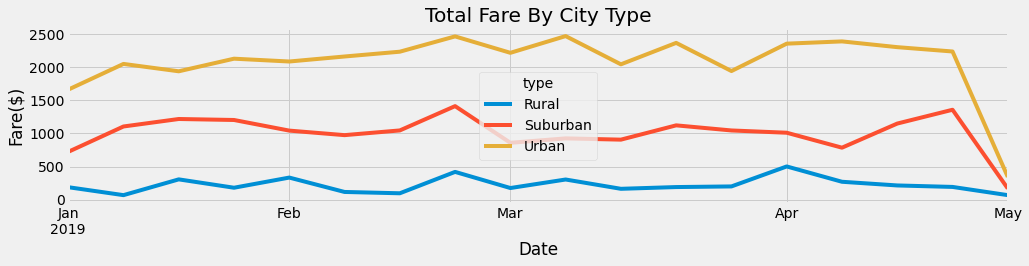

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.pyplot as plt
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')
# Change figure size
plt.rcParams["figure.figsize"] = (15,3)
#plt.plot(new_weekly_pivot_table)
new_weekly_pivot_table.plot()
# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.title("Total Fare By City Type")
plt.show()